# Okun's Law

EDA (numerical, visual, descriptive).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('W3/hw3_data.csv')
df.head()

,date,gdp,urate
0,1/1/1948,265.742,3.4
1,4/1/1948,272.567,3.9
2,7/1/1948,279.196,3.6
3,10/1/1948,280.366,3.7
4,1/1/1949,275.034,4.3


In [3]:
df.count()

date     292
gdp      292
urate    292
dtype: int64

In [4]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                gdp      urate
count    292.000000  292.00000
mean    6481.725808    5.77911
std     6487.790355    1.74368
min      265.742000    2.60000
25%      802.669250    4.50000
50%     4046.925500    5.60000
75%    11011.904000    6.82500
max    21747.394000   14.80000


In [5]:
df.info

<bound method DataFrame.info of           date        gdp  urate
0     1/1/1948    265.742    3.4
1     4/1/1948    272.567    3.9
2     7/1/1948    279.196    3.6
3    10/1/1948    280.366    3.7
4     1/1/1949    275.034    4.3
..         ...        ...    ...
287  10/1/2019  21747.394    3.6
288   1/1/2020  21561.139    3.5
289   4/1/2020  19520.114   14.8
290   7/1/2020  21170.252   10.2
291  10/1/2020  21494.731    6.9

[292 rows x 3 columns]>

Data Distribution Analysis:


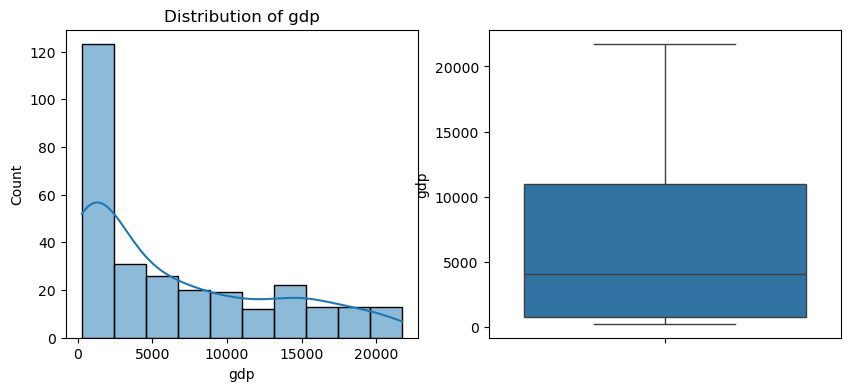

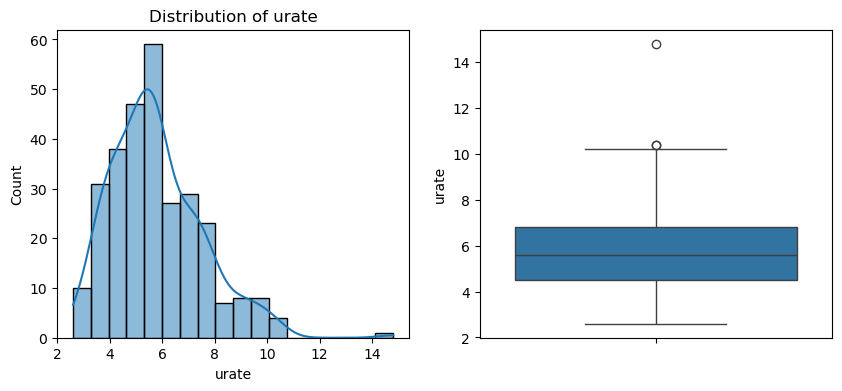

In [7]:
import seaborn as sns

print("Data Distribution Analysis:")
for column in df.columns[1:]:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])

Looking at the boxplots, I can see a couple of outliers in the unemployment rate distribution. But there don’t seem to be many outliers in the GDP distribution.

Both series are right-skewed, with peaks around 2000 for GDP and 6 for the unemployment rate, so it makes sense that there are some outliers.


In [8]:
print("\nCorrelation Matrix:")
print(df[['gdp', 'urate']].corr())


Correlation Matrix:
           gdp    urate
gdp    1.00000  0.14432
urate  0.14432  1.00000


From the correlation matrix, GDP and unemployment rate have a weak positive relationship of around 0.144.

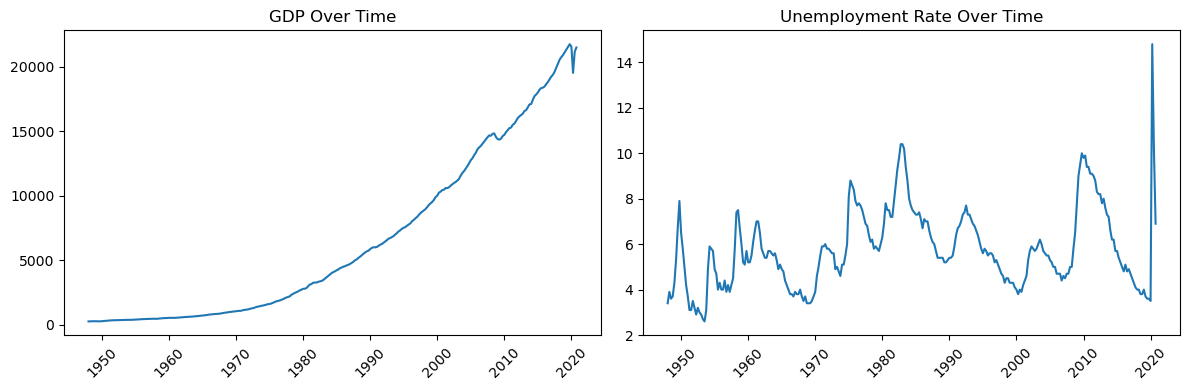

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(pd.to_datetime(df['date']), df['gdp'])
plt.title('GDP Over Time')
plt.xticks(rotation=45)

plt.subplot(122)
plt.plot(pd.to_datetime(df['date']), df['urate'])
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

None of the distributions appear to be stationary. This means there will be a need to apply transformations or differencing.

B. What is Okun’s Law? Does our dataset fit what we would expect to see? Why or why not?

Okun’s Law describes an relationship between changes in economic growth and changes in the unemployment rate. It generally states that when the economy grows more slowly, unemployment increases. For example, for every 1% increase in unemployment, GDP decreases by about 2%. The relationship can be expressed as:

(change in Y) = k - c (change in U)


where:
	•	change in Y is the percentage change in real GDP,
	•	change in U is the change in the unemployment rate
	•	c is a constant
	•	k is the Okun coefficient

From the correlation matrix in the dataset, the correlation between GDP and the unemployment rate is 0.14432. This is a very weak positive correlation, whereas we would expect a strong negative correlation according to Okun’s Law.

Our dataset may not fit Okun’s Law as expected due to several resasons, such as:
	1.	Structural Changes in the Economy: Okun’s Law is an empirical rule that holds under certain macroeconomic conditions. The relationship may have changed over time due to technological advancements, globalization, or labor market shifts.
	2.	Measurement Issues: If GDP is in nominal rather than real terms, inflation effects could be distorting the expected negative relationship.
	3.	Policy and External Factors: Government interventions, fiscal policies, and external shocks can break the expected relationship.

In conclusion, the dataset does not support Okun’s Law based on the correlation analysis, which could be due to data limitations or external influences.


C. Create a column that shows GDP change as a percentage and a column that shows UE rate as a change in percentage points. For date 4/1/1948 GDP change = 2.568, UE diff = 0.5

In [10]:
df['gdp_pct_change'] = df['gdp'].pct_change() * 100
df['urate_change'] = df['urate'].diff()

print("\nValues for 4/1/1948:")
print(df[df['date'] == '4/1/1948'][['gdp_pct_change', 'urate_change']])


Values for 4/1/1948:
   gdp_pct_change  urate_change
1        2.568281           0.5


D. Split into Train/test ( ) and create a scatterplot, verifying the negative relationship in Okun’s law.

In [11]:
from sklearn.model_selection import train_test_split

# Removing the first row since it has Na values due to differencing.
df_clean = df.dropna()

X = df_clean[['urate_change']]
y = df_clean['gdp_pct_change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Length of Train Set: " + str(X_train.shape[0]))
print("Length of Test Set: " + str(y_test.shape[0]))

smape_results = {}

Length of Train Set: 232
Length of Test Set: 59


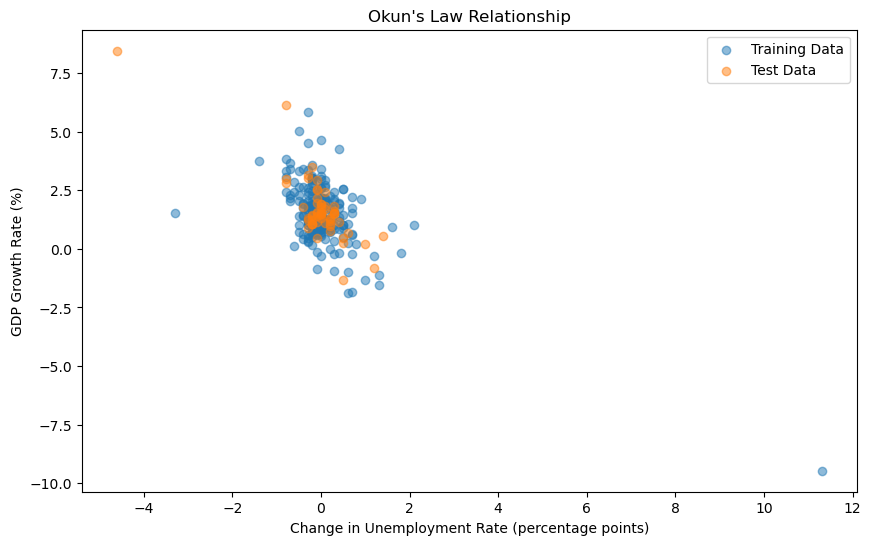

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, label='Test Data')
plt.xlabel('Change in Unemployment Rate (percentage points)')
plt.ylabel('GDP Growth Rate (%)')
plt.title("Okun's Law Relationship")
plt.legend()
plt.show()

Based on the scatter plot, the negative relationship between GDP growth and changes in unemployment can be seen. When unemployment increases, GDP growth tends to decrease. For example, when the unemployment rate shows positive changes around +2 to +4 percentage points, GDP growth rates are often negative or very low between 0% and -2.5%. This pattern appears consistent across both the training data and the test data, suggesting a negative correlation that supports Okun's Law. The relationship isn't perfectly linear, showing some scatter, but the overall downward trend is evident.

E. Fit a linear model on the Training set. State Okun’s law using your data e.g. interpret the coefficients.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.3f}")
print(f"Slope: {model.coef_[0]:}")
print(f"R-squared: {model.score(X_train, y_train):.3f}")


Model Coefficients:
Intercept: 1.519
Slope: -0.9545056423273319
R-squared: 0.404


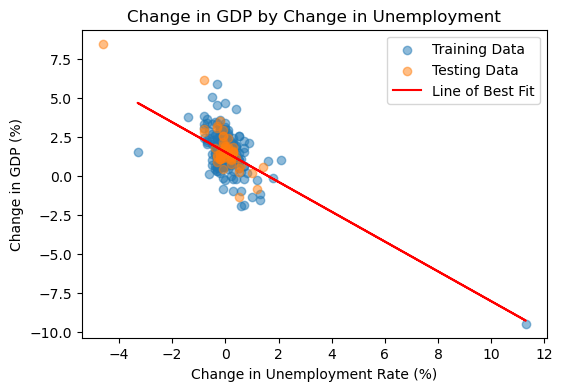

In [17]:
# Calculate the predicted y values based on the linear regression model
y_pred = model.predict(X_train)

# Plotting the data points and the trend line
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, alpha=0.5, label='Testing Data')
plt.plot(X_train, y_pred, color='red', label='Line of Best Fit')  # Line of best fit from model

# Add labels and title
plt.xlabel('Change in Unemployment Rate (%)')
plt.ylabel('Change in GDP (%)')
plt.title('Change in GDP by Change in Unemployment')

# Display legend and show plot
plt.legend()
plt.show()

The model suggests that if the unemployment rate remains unchanged, GDP would increase by about 1.519%. For the slope we got a -0.95, meaning that for every 1% increase in unemployment, GDP is predicted to drop by 0.95%.

The model's R-squared is 0.404, which means the model explains around 40% of the variation in GDP based on unemployment rate changes. This suggests a moderate fit, only capturing some of the relationship but leaving the mayority unexplained. The outliers seem to have a significant impact on the predictions, potentially skewing the results.

F. How can we use this model to predict level of GDP dollars in the future? What will we need, what are the resulting limitations?

To predict future GDP levels, we can create a regression model using unemployment as the independent variable and GDP as the dependent variable.

GDP_t = beta_0 + beta_1 * urate_t + epsilon_t

Where:
- GDP_t is the projected GDP.
- urate_t is the unemployment rate.
- beta_0 is the intercept.
- beta_1 is the coefficient estimating the effect of unemployment on GDP.
- epsilon_t is the error term.

To use this model we would need data of the projected unemployment rate for future periods, and some information of external factors that may influence GDP beyond unemployment to add them as explaining variables.

In terms of the limitations of the model. The model can give weak predictive results, since the dataset does not show a strong correlation between GDP and unemployment, the predictions could have a high level of uncertainty. Another limitation is that the model assumes unemployment is the key driver of economic growth, but fails to consider other macroeconomic variables like inflation, interest rates, government policies, etc. The economy goes trough structural changes throughout time which means that historical relationships might not hold in the future.

It is important to consider addressing outliers to improve the predictive accuracy of the model. It is also important to consider accurate forecasts from official sources like the Fred. Finally, one of the key assumptions of linear regression is linearity. The model assumes a straightforward linear relationship in the data, which may not fully capture the complexities of unemployment rate changes and economic growth.

In conclusion, while the model can give a rough estimate of future GDP levels based on expected unemployment patterns, it should be supplemented with additional macroeconomic variables and qualitative analysis to improve its accuracy. ￼

*Box Jenkins model for GDP*

A. Perform transformations or differencing until you can visually and statistically confirm stationarity on training set. Summarize the changes to your time series.

In [18]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
import seaborn as sns

Train Size: 232
Original Data Stationarity Test:
ADF Statistic for Original GDP: 3.1488
p-value: 1.0000
Critical values:
	1%: -3.4608
	5%: -2.8750
	10%: -2.5739
Conclusion: The series is NON-STATIONARY (p-value > 0.05)




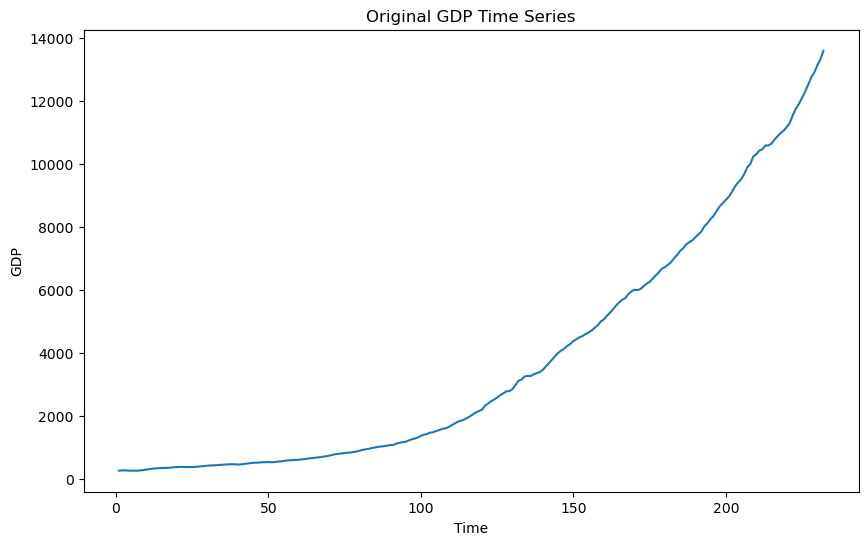

In [20]:
# Define train_size based on the length of the training data
train_size = len(X_train)
print(f"Train Size: {train_size}")

# Extracting from the existing training and test data for GDP.
y_train_gdp = df_clean['gdp'].iloc[:train_size]
y_test_gdp = df_clean['gdp'].iloc[train_size:]

# Checking for stationarity.
def check_stationarity(series, title):
    result = adfuller(series)
    print(f'ADF Statistic for {title}: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] < 0.05:
        print(f"Conclusion: The series is STATIONARY (p-value < 0.05)")
    else:
        print(f"Conclusion: The series is NON-STATIONARY (p-value > 0.05)")
    print("\n")

print("Original Data Stationarity Test:")
check_stationarity(y_train_gdp, 'Original GDP')

plt.figure(figsize=(10, 6))
plt.plot(y_train_gdp)
plt.title('Original GDP Time Series')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.show()

Log Transformation Stationarity Test:
ADF Statistic: -0.0723
p-value: 0.9521
Critical values:
	1%: -3.4608
	5%: -2.8750
	10%: -2.5739
Conclusion: The series is NON-STATIONARY (p-value > 0.05)


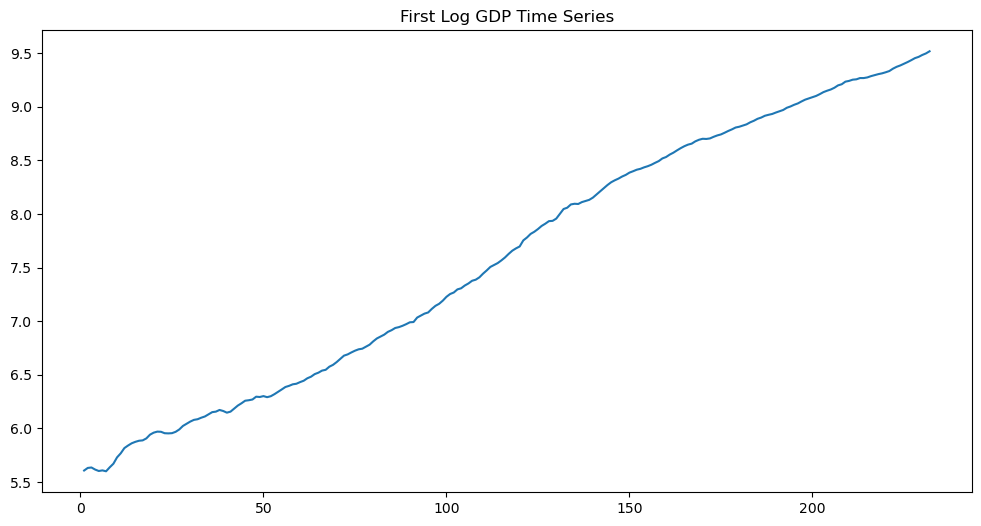

In [25]:
from statsmodels.tsa.stattools import adfuller

# Function to test stationarity
def test_stationarity(timeseries):
	result = adfuller(timeseries)
	print(f'ADF Statistic: {result[0]:.4f}')
	print(f'p-value: {result[1]:.4f}')
	print('Critical values:')
	for key, value in result[4].items():
		print(f'\t{key}: {value:.4f}')
	if result[1] < 0.05:
		print("Conclusion: The series is STATIONARY (p-value < 0.05)")
	else:
		print("Conclusion: The series is NON-STATIONARY (p-value > 0.05)")

# Take first difference
y_train_gdp_log = np.log(y_train_gdp)
y_test_gdp_log = np.log(y_test_gdp)

print("Log Transformation Stationarity Test:")
test_stationarity(y_train_gdp_log)

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(y_train_gdp_log)
plt.title('First Log GDP Time Series')
plt.show()

First Difference Log Stationarity Test:
ADF Statistic: -2.0333
p-value: 0.2722
Critical values:
	1%: -3.4611
	5%: -2.8751
	10%: -2.5740
Conclusion: The series is NON-STATIONARY (p-value > 0.05)


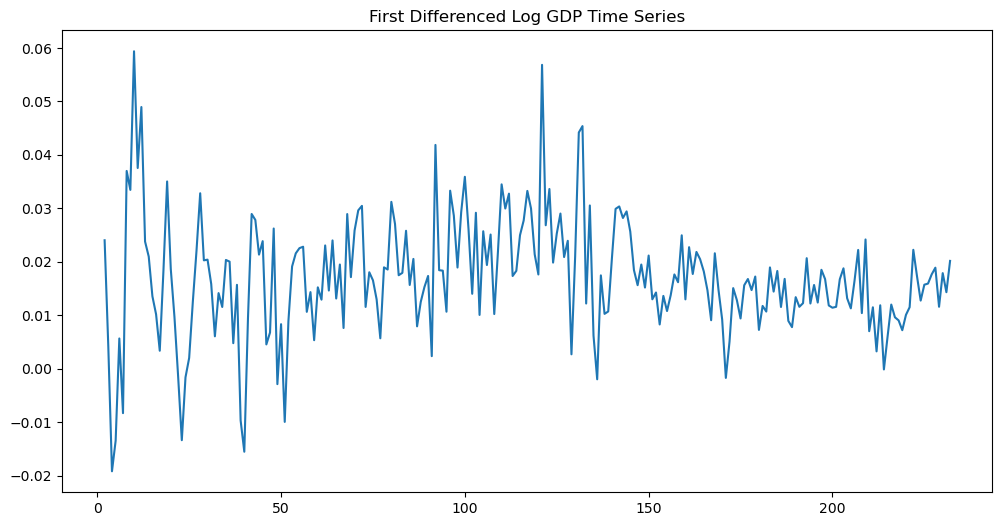

In [27]:
y_train_gdp_log_diff = y_train_gdp_log.diff()[1:]

print("First Difference Log Stationarity Test:")
test_stationarity(y_train_gdp_log_diff)

plt.figure(figsize=(12, 6))
plt.plot(y_train_gdp_log_diff)
plt.title('First Differenced Log GDP Time Series')
plt.show()

Second Difference Log Stationarity Test:
ADF Statistic: -7.3297
p-value: 0.0000
Critical values:
	1%: -3.4611
	5%: -2.8751
	10%: -2.5740
Conclusion: The series is STATIONARY (p-value < 0.05)


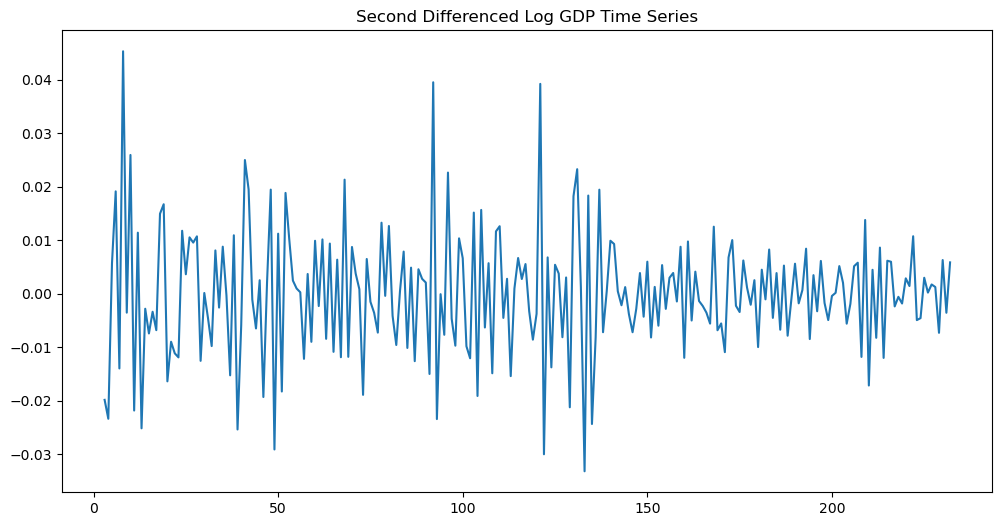

In [28]:
y_train_gdp_log_diff2 = y_train_gdp_log_diff.diff()[1:]

print("Second Difference Log Stationarity Test:")
test_stationarity(y_train_gdp_log_diff2)

plt.figure(figsize=(12, 6))
plt.plot(y_train_gdp_log_diff2)
plt.title('Second Differenced Log GDP Time Series')
plt.show()

I had to apply a log and a second difference to the GDP data to be able to have a stationary serie.

B. Create and interpret ACF and PACF plots.

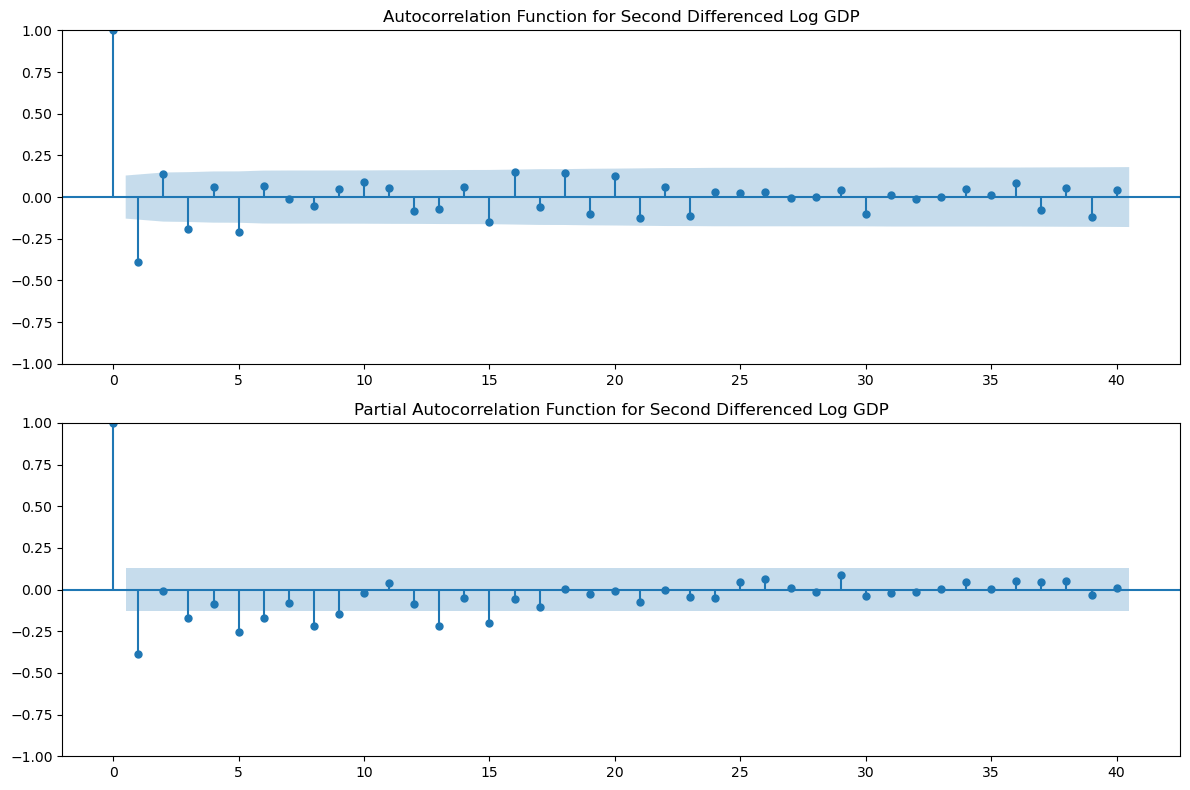

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(y_train_gdp_log_diff2, ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function for Second Differenced Log GDP')

# PACF plot
plot_pacf(y_train_gdp_log_diff2, ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function for Second Differenced Log GDP')

plt.tight_layout()
plt.show()

In the ACF plot, there’s minimal significant autocorrelation beyond the first lag, suggesting that most of the serial correlation has been removed. Since the first two lags exceed the critical threshold, we should consider an MA value of either 1 or 2 when building an ARIMA model.

The PACF indicates that the first two lags exceed the threshold, we should also consider AR values of 1 or 2 for the model.

C. Fit an appropriate Box Jenkins model on training set.

In [39]:
# Fitting ARIMA model using d=2 since I am using the second difference. Based on the ACF/PACF plots, I will try to several ARIMA models and check AIC.
model1 = ARIMA(y_train_gdp_log, order=(2,2,1))
model2 = ARIMA(y_train_gdp_log, order=(2,2,2))
modelar1 = ARIMA(y_train_gdp_log, order=(1,2,1))
modelar2 = ARIMA(y_train_gdp_log, order=(1,2,2))

results1 = model1.fit()
results2 = model2.fit()
resultsar1 = modelar1.fit()
resultsar2 = modelar2.fit()

# Comparing AIC
print("ARIMA(2,2,1) AIC:", results1.aic)
print("ARIMA(2,2,2) AIC:", results2.aic)
print("ARIMA(1,2,1) AIC:", resultsar1.aic)
print("ARIMA(1,2,2) AIC:", resultsar2.aic)

# Using the model with lower AIC.
print("\nSelected ARIMA(2,2,2) based on lower AIC")
results = results2

print(results.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(2,2,1) AIC: -1430.0196422706667
ARIMA(2,2,2) AIC: -1471.1596005060892
ARIMA(1,2,1) AIC: -1431.311560773709
ARIMA(1,2,2) AIC: -1435.3521317722561

Selected ARIMA(2,2,2) based on lower AIC
                               SARIMAX Results                                
Dep. Variable:                    gdp   No. Observations:                  232
Model:                 ARIMA(2, 2, 2)   Log Likelihood                 740.580
Date:                Wed, 29 Jan 2025   AIC                          -1471.160
Time:                        15:34:33   BIC                          -1453.969
Sample:                             0   HQIC                         -1464.225
                                - 232                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.

I will proceed with ARIMA(2,2,2) since its AIC is the lowest.

The model includes two autoregressive (AR) terms, two moving average (MA) terms, and two differencing steps to ensure stationarity. Looking at the coefficients, AR(2) is statistically significant, meaning past values at lag 2 have a strong effect on GDP. However, AR(1) is not significant, suggesting that including this term may not add much predictive value.

For the moving average terms, MA(1) is marginally significant, while MA(2) is more strongly significant. This suggests that past errors at lags 1 and 2 do contribute to the model, but MA(1) might not be as critical.

The Ljung-Box test result 0.17 indicates that the residuals do not exhibit strong autocorrelation, meaning the model is likely capturing most of the patterns effectively. However, the Jarque-Bera test 57.24 suggests that the residuals are not normally distributed, which could impact the accuracy of confidence intervals and predictions.

D. Check residuals (scatter plot, histogram, ACF, portmanteau tests) Give a summary of your residuals.

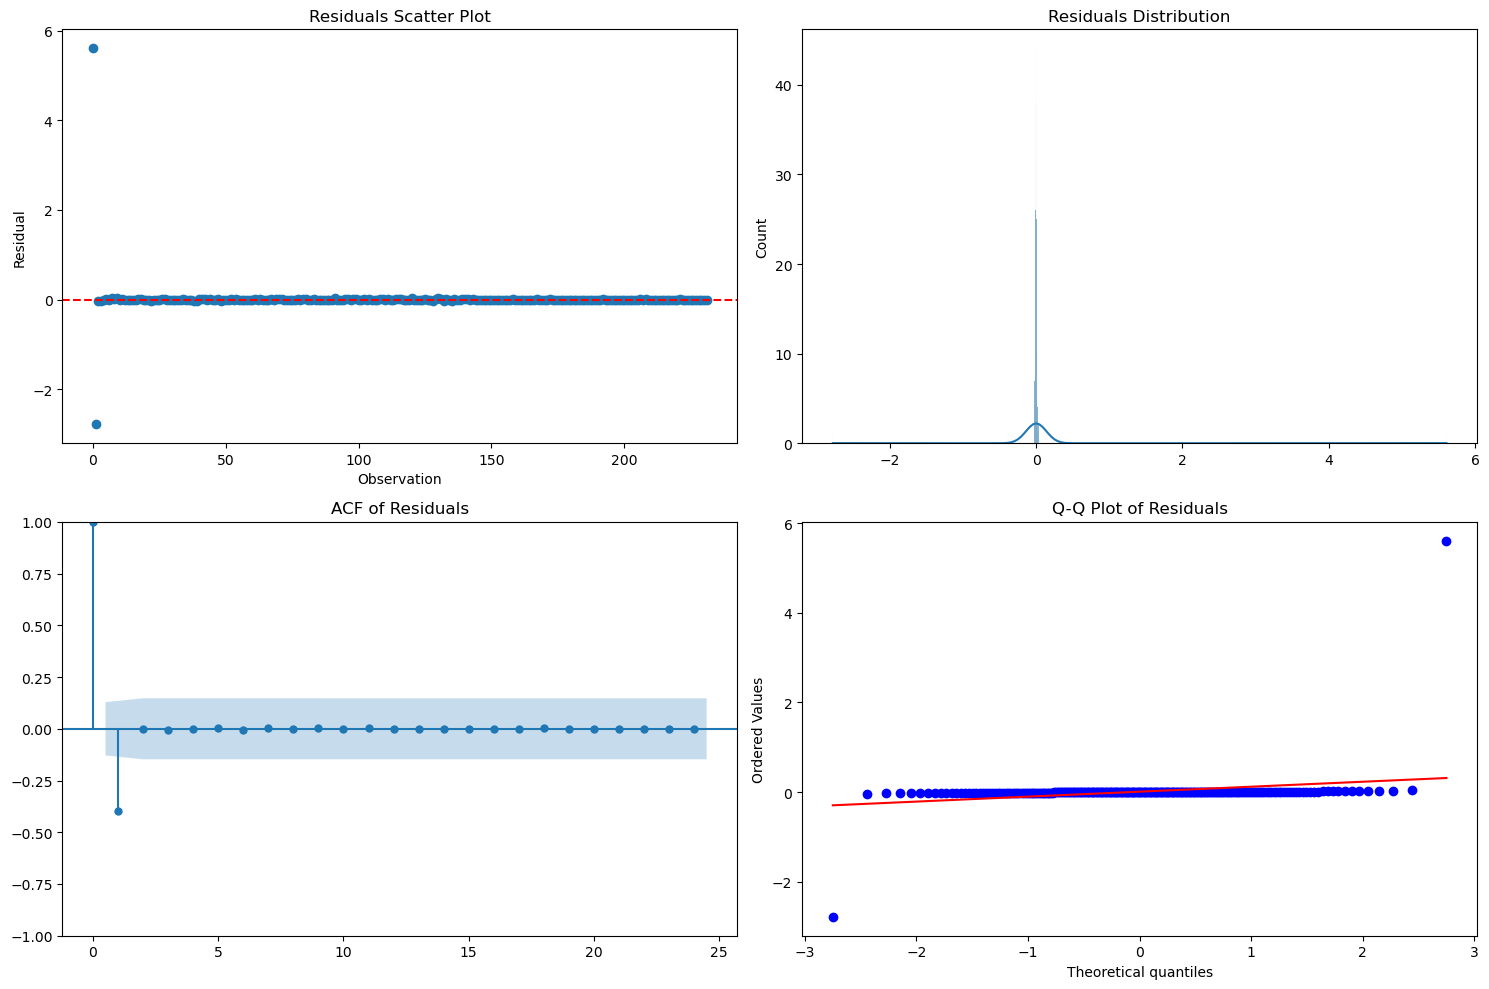


Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  36.829762   0.000061
20  36.835748   0.012244
30  36.839931   0.181855

Residual Statistics:
Mean of residuals: 0.0122
Standard deviation of residuals: 0.4109
Skewness: 9.5361
Kurtosis: 154.4916


In [40]:
residuals = results2.resid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot of residuals
ax1.scatter(range(len(residuals)), residuals)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Residuals Scatter Plot')
ax1.set_xlabel('Observation')
ax1.set_ylabel('Residual')

# Histogram of residuals with normal curve
sns.histplot(residuals, kde=True, ax=ax2)
ax2.set_title('Residuals Distribution')

# ACF of residuals
plot_acf(residuals, ax=ax3)
ax3.set_title('ACF of Residuals')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print("\nLjung-Box Test Results:")
print(lb_test)

# Residual statistics
print("\nResidual Statistics:")
print(f"Mean of residuals: {np.mean(residuals):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals):.4f}")
print(f"Skewness: {stats.skew(residuals):.4f}")
print(f"Kurtosis: {stats.kurtosis(residuals):.4f}")

The residual scatter plot indicates that most residuals cluster around zero, but a few extreme outliers are present. There is no clear sign of heteroscedasticity, as residuals remain relatively consistent across observations.

The residual distribution is non-normal, with extreme kurtosis 154.49, indicating an extremely sharp peak and heavy tails. The skewness value of 9.54 suggests a rightward asymmetry, meaning the residuals are not symmetrically distributed. The mean residual is 0.0122, sand the standard deviation is 0.4109. 

The ACF plot shows no significant autocorrelation beyond the first lag, suggesting that serial correlation is mostly removed. However, the Q-Q plot highlights extreme deviations from normality, particularly in the tails, reinforcing the presence of residuals.

The Ljung-Box test results indicate mixed evidence of autocorrelation. At lag 10, the test is highly significant, suggesting the presence of residual autocorrelation. However, at lag 20 and lag 30, it suggests that the autocorrelation diminishes at higher lags.

E. Print model evaluation metrics MAE, MSE, MAPE, sMAPE on test set.

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


Model Evaluation Metrics on Test Set:
MAE:   0.2433
MSE:   0.0753
RMSE:  0.2745
MAPE:  2.60%
sMAPE: 2.56%

First few rows of predictions vs actual values:
       Actual  Predicted     Error
232       NaN   9.534624       NaN
233  9.528780   9.551962 -0.023182
234  9.537301   9.567617 -0.030316
235  9.549468   9.583920 -0.034452
236  9.561601   9.599401 -0.037801


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


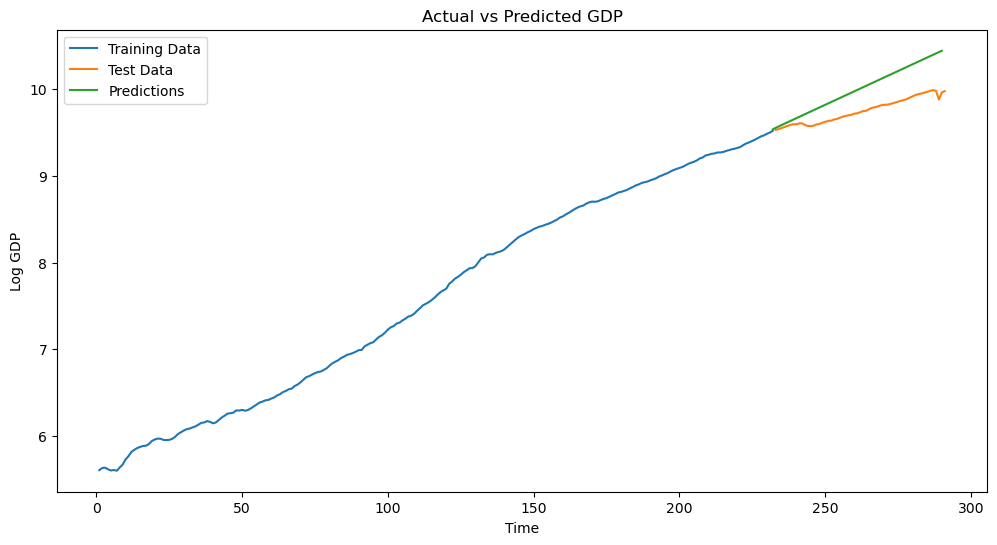

In [58]:
# Get forecast for test period
forecast = results2.get_forecast(steps=len(y_test_gdp_log))
predictions = forecast.predicted_mean

# Calculate metrics
mae = mean_absolute_error(y_test_gdp_log, predictions)
mse = mean_squared_error(y_test_gdp_log, predictions)
rmse = np.sqrt(mse)

# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate sMAPE (Symmetric Mean Absolute Percentage Error)
def calculate_smape(actual, predicted):
    return np.mean(2 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 100

mape = calculate_mape(y_test_gdp_log, predictions)
smape = calculate_smape(y_test_gdp_log, predictions)

# Print all metrics
print("\nModel Evaluation Metrics on Test Set:")
print(f"MAE:   {mae:.4f}")
print(f"MSE:   {mse:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAPE:  {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")

# Optional: Create a dataframe with actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test_gdp_log,
    'Predicted': predictions,
    'Error': y_test_gdp_log - predictions
})
print("\nFirst few rows of predictions vs actual values:")
print(comparison_df.head())

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train_gdp_log, label='Training Data')
plt.plot(y_test_gdp_log, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Time')
plt.ylabel('Log GDP')
plt.legend()
plt.show()


*Box Jenkins model for Unemployment rate.*

A. Perform transformations or differencing until you can visually and statistically prove stationarity on training set. Summarize the changes to your time series.

In [84]:
# Train_size based on the length of the training data
train_size = len(X_train)
print(f"Train Size: {train_size}")

# Extracting from the existing training and test data for GDP.
y_train_urate = df_clean['urate'].iloc[:train_size]
y_test_urate = df_clean['urate'].iloc[train_size:]

# Checking for stationarity.
def check_stationarity(series, title):
    result = adfuller(series)
    print(f'ADF Statistic for {title}: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if result[1] < 0.05:
        print(f"Conclusion: The series is STATIONARY (p-value < 0.05)")
    else:
        print(f"Conclusion: The series is NON-STATIONARY (p-value > 0.05)")
    print("\n")

print("Original Data Stationarity Test:")
check_stationarity(y_train_urate, 'Original Unemployment Rate')

Train Size: 232
Original Data Stationarity Test:
ADF Statistic for Original Unemployment Rate: -2.6661
p-value: 0.0801
Critical values:
	1%: -3.4602
	5%: -2.8746
	10%: -2.5738
Conclusion: The series is NON-STATIONARY (p-value > 0.05)





First Difference Stationarity Test:
ADF Statistic for Differenced Unemployment Rate: -5.3434
p-value: 0.0000
Critical values:
	1%: -3.4602
	5%: -2.8746
	10%: -2.5738
Conclusion: The series is STATIONARY (p-value < 0.05)




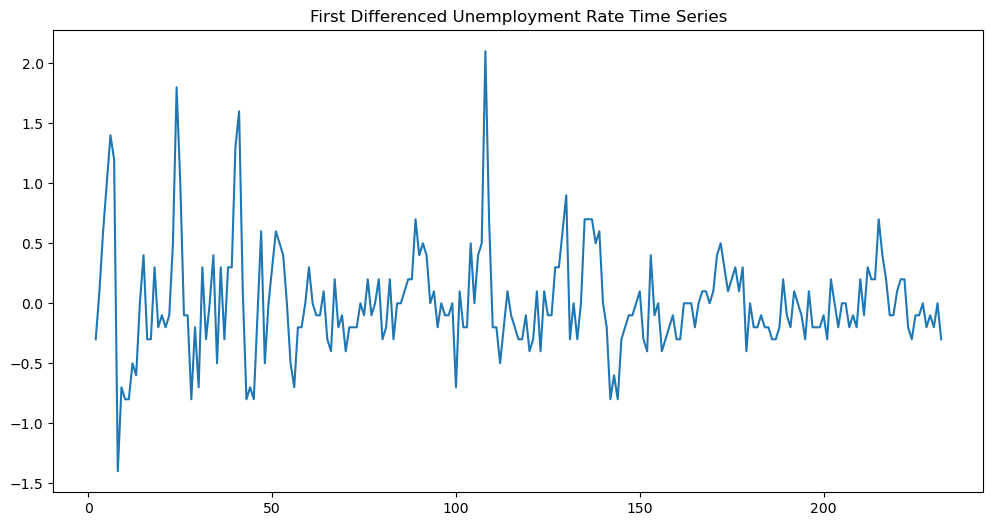

In [69]:
# Take first difference
urate_diff = y_train_urate.diff().dropna()
urate_test= y_test_urate.diff().dropna()

# Check stationarity after differencing
print("\nFirst Difference Stationarity Test:")
check_stationarity(urate_diff, 'Differenced Unemployment Rate')

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(urate_diff)
plt.title('First Differenced Unemployment Rate Time Series')
plt.show()

Differencing the series once was required to make the series stationary.

B. Create and interpret ACF and PACF plots.

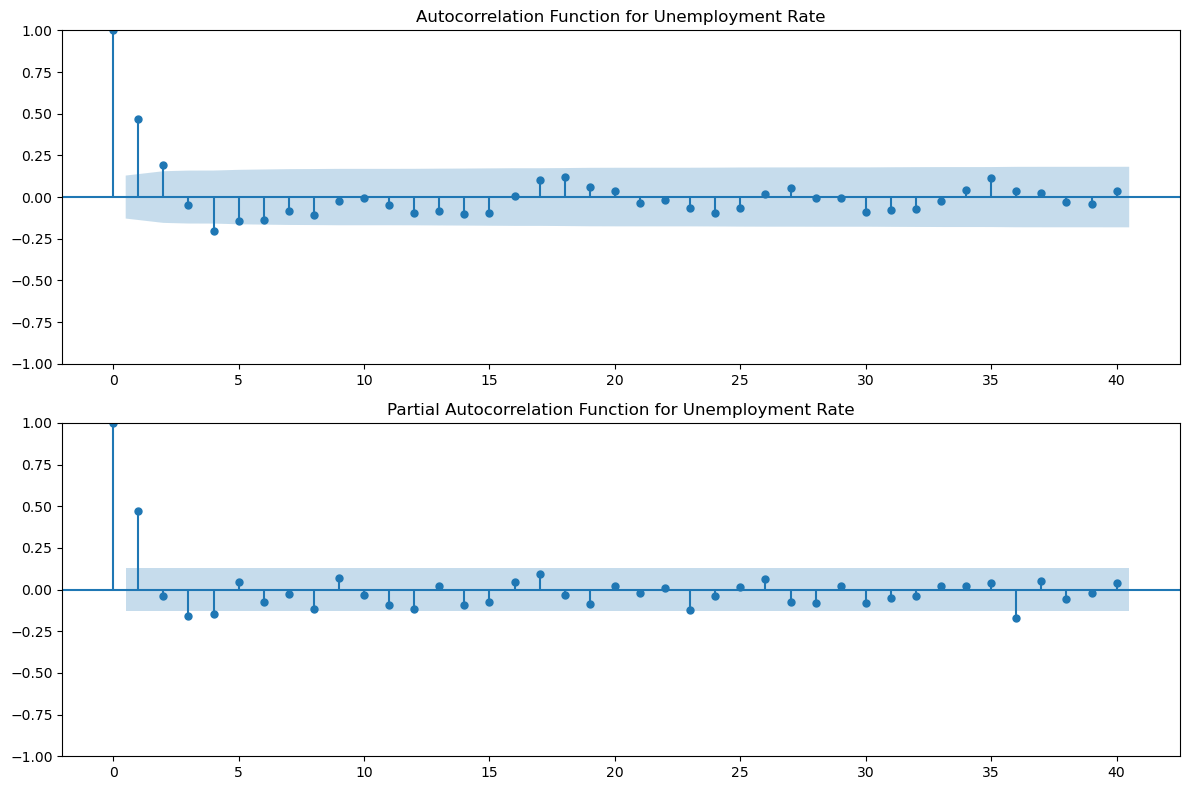

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(urate_diff, ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function for Unemployment Rate')

# PACF plot
plot_pacf(urate_diff, ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function for Unemployment Rate')

plt.tight_layout()
plt.show()

C. Fit an appropriate Box Jenkins model on training set.

The ACF plot shows a slowly declining pattern. The PACF plot shows significant spikes at lags 1 and 2 and there's a sharp cutoff after lag 2. Given these results, I will run an ARIMA(1,1,1) model.

In [65]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ARIMA (1,1,1) model
model3 = ARIMA(urate_diff, order=(1, 1, 1))
results3 = model3.fit()

print(results3.summary())

# AIC
print("ARIMA(1,1,1) AIC:", results3.aic)

                               SARIMAX Results                                
Dep. Variable:                  urate   No. Observations:                  231
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -109.097
Date:                Wed, 29 Jan 2025   AIC                            224.194
Time:                        16:25:06   BIC                            234.508
Sample:                             0   HQIC                           228.354
                                - 231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4771      0.052      9.093      0.000       0.374       0.580
ma.L1         -1.0000     27.741     -0.036      0.971     -55.372      53.372
sigma2         0.1483      4.112      0.036      0.9

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


I will also add an ARIMA(2,1,1) model to compare the performance.

In [64]:
# ARIMA(2,1,1) model
model4 = ARIMA(urate_diff, order=(2, 1, 1))
results4 = model4.fit()

print(results4.summary())

# Comparing AIC
print("ARIMA(2,1,1) AIC:", results4.aic)


                               SARIMAX Results                                
Dep. Variable:                  urate   No. Observations:                  231
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -108.955
Date:                Wed, 29 Jan 2025   AIC                            225.910
Time:                        16:24:49   BIC                            239.663
Sample:                             0   HQIC                           231.458
                                - 231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4936      0.064      7.653      0.000       0.367       0.620
ar.L2         -0.0351      0.060     -0.583      0.560      -0.153       0.083
ma.L1         -0.9999      7.915     -0.126      0.8

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

Based on the AIC results I will choose the ARIMA (1,1,1)) model to proceed.

The model includes one autoregressive term, one moving average term, and one differencing step to make the series stationary. The AR(1) coefficient is statistically significant, meaning past values at lag 1 have a strong impact on the series. However, the MA(1) coefficient is not statistically significant, suggesting that the moving average term might not be necessary. The Ljung-Box test result 0.78 shows no strong autocorrelation in the residuals, meaning the model is well specified. However, the Jarque-Bera test suggests that the residuals are not normally distributed, which could affect forecasting.

D. Check residuals (scatter plot, histogram, ACF, portmanteau tests)  Give a summary of your residuals.

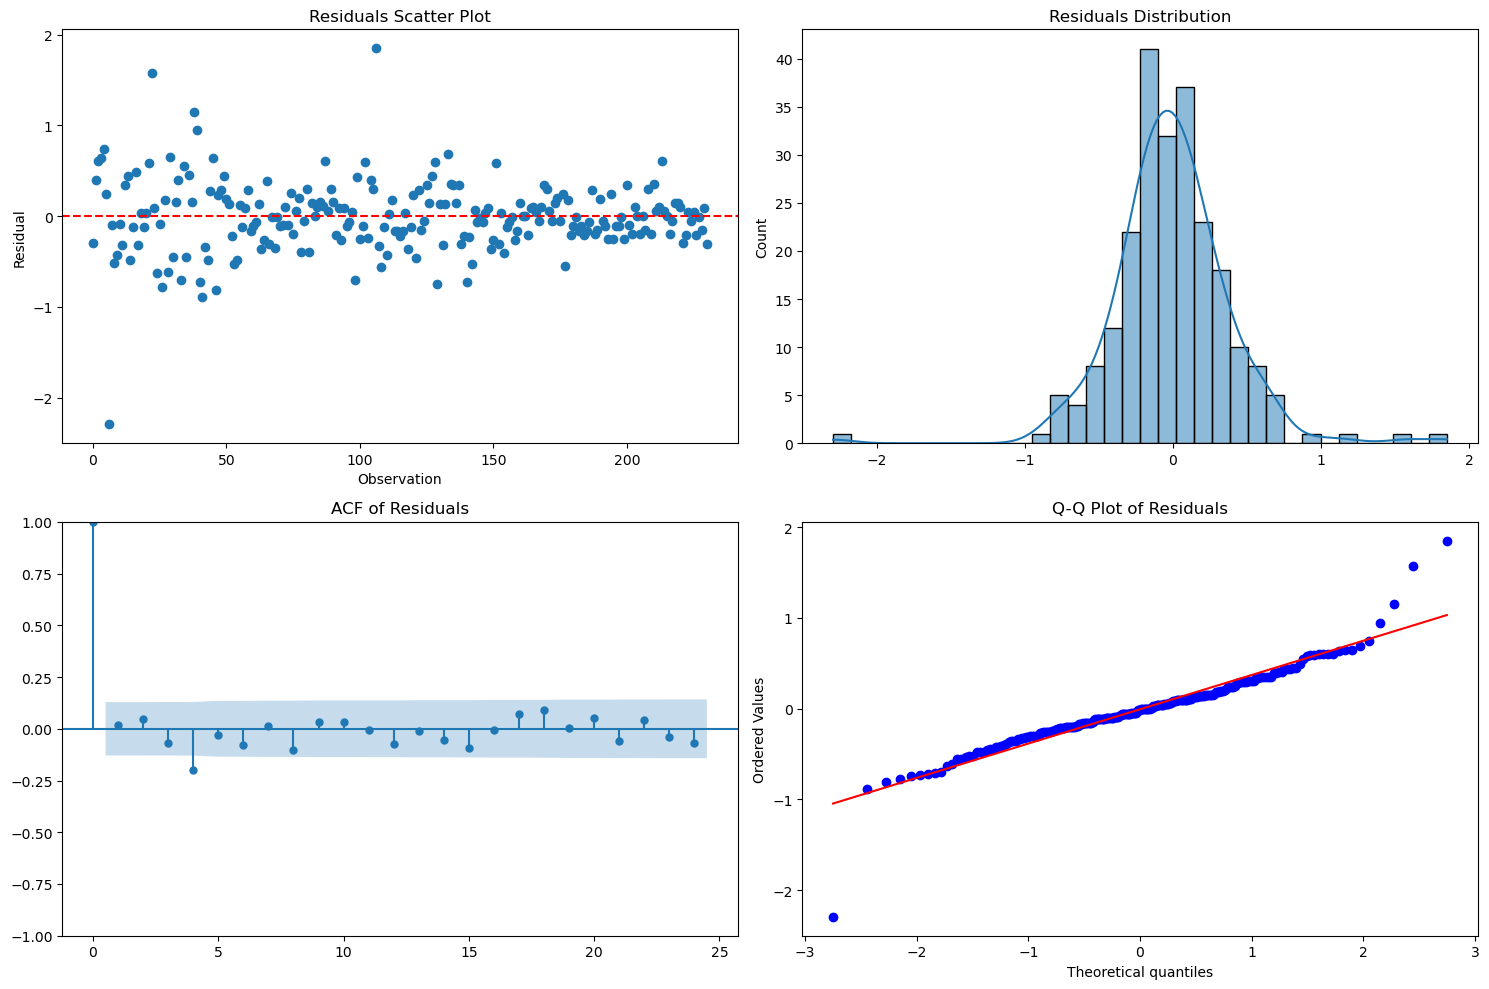


Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  16.091687   0.097038
20  24.270070   0.230794
30  32.850047   0.329087

Residual Statistics:
Mean of residuals: -0.0075
Standard deviation of residuals: 0.3928
Skewness: -0.0431
Kurtosis: 6.9749


In [85]:
residuals2 = results3.resid

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot of residuals
ax1.scatter(range(len(residuals2)), residuals2)
ax1.axhline(y=0, color='r', linestyle='--')
ax1.set_title('Residuals Scatter Plot')
ax1.set_xlabel('Observation')
ax1.set_ylabel('Residual')

# Histogram of residuals with normal curve
sns.histplot(residuals2, kde=True, ax=ax2)
ax2.set_title('Residuals Distribution')

# ACF of residuals
plot_acf(residuals2, ax=ax3)
ax3.set_title('ACF of Residuals')

# Q-Q plot
stats.probplot(residuals2, dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(residuals2, lags=[10, 20, 30], return_df=True)
print("\nLjung-Box Test Results:")
print(lb_test)

# Residual statistics
print("\nResidual Statistics:")
print(f"Mean of residuals: {np.mean(residuals2):.4f}")
print(f"Standard deviation of residuals: {np.std(residuals2):.4f}")
print(f"Skewness: {stats.skew(residuals2):.4f}")
print(f"Kurtosis: {stats.kurtosis(residuals2):.4f}")

The residual scatter plot suggests no clear pattern or strong heteroscedasticity, with residuals mostly staying within +/- 1 units, except for a few small outliers. The histogram of residuals shows a normal distribution, though the kurtosis value 6.97 indicates heavier tails than a standard normal distribution, meaning occasional extreme values are more likely. The skewness value -0.043 is close to zero, suggesting little asymmetry in the residuals. The mean residual is -0.0075, indicating the model does not have significant bias, and the standard deviation of 0.39 suggests low variability. The ACF plot shows no significant autocorrelation, with all lags falling within the confidence bands, which is a good sign for model. The Q-Q plot aligns well with the normal distribution in the middle range but shows deviations in the tails, consistent with the high kurtosis. The Ljung-Box test results are not significant, indicating that the residuals behave like white noise and do not exhibit strong autocorrelation.

E. Print model evaluation metrics MAE, MSE, MAPE, sMAPE on test set.


Model Evaluation Metrics on Test Set:
MAE:   0.5816
MSE:   2.8872
RMSE:  1.6992
MAPE:  inf%
sMAPE: 199.45%

First few rows of predictions vs actual values:
     Actual  Predicted     Error
231     NaN  -0.142555       NaN
232     NaN  -0.067442       NaN
233     NaN  -0.031607       NaN
234     0.0  -0.014512  0.014512
235    -0.3  -0.006356 -0.293644


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


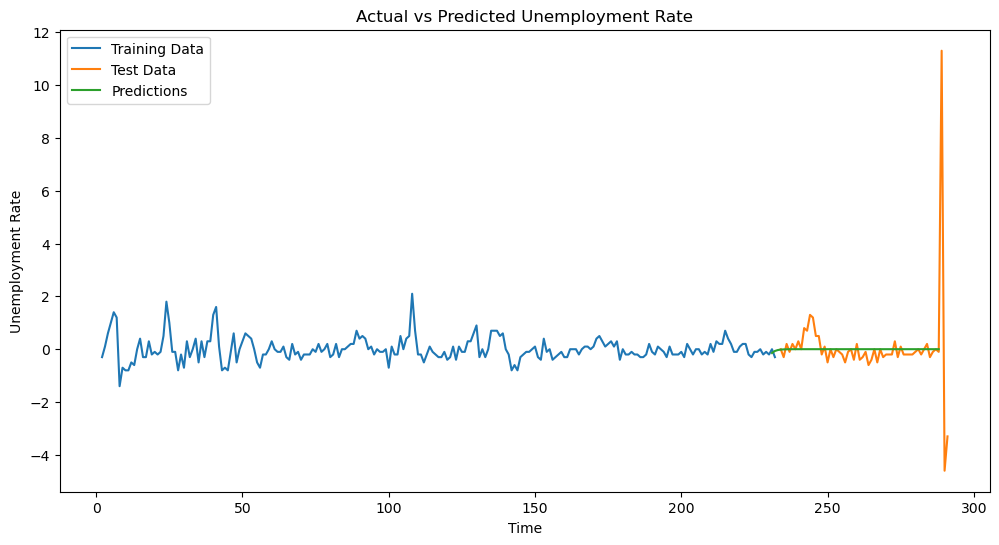

In [86]:
# Get forecast for test period
forecast = results3.get_forecast(steps=len(urate_test))
predictions = forecast.predicted_mean

# Calculate metrics
mae = mean_absolute_error(urate_test, predictions)
mse = mean_squared_error(urate_test, predictions)
rmse = np.sqrt(mse)

# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate sMAPE (Symmetric Mean Absolute Percentage Error)
def calculate_smape(actual, predicted):
    return np.mean(2 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 100

mape = calculate_mape(urate_test, predictions)
smape = calculate_smape(urate_test, predictions)

# Print all metrics
print("\nModel Evaluation Metrics on Test Set:")
print(f"MAE:   {mae:.4f}")
print(f"MSE:   {mse:.4f}")
print(f"RMSE:  {rmse:.4f}")
print(f"MAPE:  {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")

# Optional: Create a dataframe with actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': urate_test,
    'Predicted': predictions,
    'Error': urate_test - predictions
})
print("\nFirst few rows of predictions vs actual values:")
print(comparison_df.head())

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(urate_diff, label='Training Data')
plt.plot(urate_test, label='Test Data')
plt.plot(predictions, label='Predictions')
plt.title('Actual vs Predicted Unemployment Rate')
plt.xlabel('Time')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.show()

*Evaluation*

A. Compare the two models’ performance using the error metrics as evidence.

In [88]:
import numpy as np

model_metrics = {
    'ARIMA(2,1,1)': {
        'MAE': 0.2433,
        'MSE': 0.0753,
        'RMSE': 0.27459,
        'MAPE': 2.6,
        'sMAPE': 2.56
    },
    'ARIMA(1,1,1)': {
        'MAE': 0.5816,
        'MSE': 2.8872,
        'RMSE': 1.6992,
        'MAPE': np.nan,
        'sMAPE': 199.45
    }
}

df_comparison = pd.DataFrame(model_metrics)

# Calculating percentage difference
df_comparison['% Difference'] = ((df_comparison['ARIMA(2,1,1)'] - df_comparison['ARIMA(1,1,1)']) / 
                                df_comparison['ARIMA(1,1,1)'] * 100).round(2)


def format_value(val, metric):
    if metric in ['MAPE', 'sMAPE']:
        return f"{val:.2f}%" if not np.isnan(val) else 'na'
    elif metric == 'MSE':
        return f"{val:,.2f}"
    else:
        return f"{val:.2f}"


for col in ['ARIMA(2,1,1)', 'ARIMA(1,1,1)']:
    for idx in df_comparison.index:
        df_comparison.loc[idx, col] = format_value(df_comparison.loc[idx, col], idx)

df_comparison['% Difference'] = df_comparison['% Difference'].apply(lambda x: f"{x:+.2f}%" if not np.isnan(x) else 'na')

print("\nModel Performance Comparison:")
print("=" * 80)
print(df_comparison.to_string())

summary_text = """
Key Findings:
    1.	The ARIMA(2,1,1) model significantly outperforms the ARIMA(1,1,1) model across all evaluation metrics.
    2.	The biggest performance gap is in sMAPE, where ARIMA(1,1,1) performs over 98.7% worse than ARIMA(2,1,1).
    3.	Even in the best-case scenario, MSE for ARIMA(1,1,1) is over 97.39% higher, indicating much greater prediction error.
    4.	MAPE further confirms the disparity, with ARIMA(1,1,1) showing a staggering 199.45% error rate compared to just 2.60% for ARIMA(2,1,1).
"""

print(summary_text)


Model Performance Comparison:
      ARIMA(2,1,1) ARIMA(1,1,1) % Difference
MAE           0.24         0.58      -58.17%
MSE           0.08         2.89      -97.39%
RMSE          0.27         1.70      -83.84%
MAPE         2.60%           na           na
sMAPE        2.56%      199.45%      -98.72%

Key Findings:
    1.	The ARIMA(2,1,1) model significantly outperforms the ARIMA(1,1,1) model across all evaluation metrics.
    2.	The biggest performance gap is in sMAPE, where ARIMA(1,1,1) performs over 98.7% worse than ARIMA(2,1,1).
    3.	Even in the best-case scenario, MSE for ARIMA(1,1,1) is over 97.39% higher, indicating much greater prediction error.
    4.	MAPE further confirms the disparity, with ARIMA(1,1,1) showing a staggering 199.45% error rate compared to just 2.60% for ARIMA(2,1,1).



/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_90601/3820627821.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.24' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comparison.loc[idx, col] = format_value(df_comparison.loc[idx, col], idx)
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_90601/3820627821.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.58' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comparison.loc[idx, col] = format_value(df_comparison.loc[idx, col], idx)


B. Based on each of the four error metrics' potential for bias, rank them in order of preference, explain why.

I will rank them from most preferred to least.
1. Root Mean Square Error (RMSE): RMSE is best for the GDP analysis because it penalizes large errors more heavily through squaring, it is also more sensitive to outliers, which is important for GDP forecasting where large errors could have significant policy implications.

2. Mean Absolute Error (MAE): It is less sensitive to outliers than RMSE and gives the average of the errors in the same units as the GDP.

3. Mean Absolute Percentage Error (MAPE): Mape is usefull for comparing in different scales, but it can be biased when actual values are close to zero.

4. Symmetric Mean Absolute Percentage Error (sMAPE): Least preferred because while it tries to fix MAPE's bias, it can still be problematic for economic data with cycles.

C. What is the rationale for using this model on these time series? Please provide an anecdotal example on why this would be an appropriate model.

The ARIMA model is appropriate because GDP typically shows both trend and seasonal patterns.The data exhibits autocorrelation, which is visible in the ACF plots and there's clear non-stationarity that needs differencing.

Anecdotal example:
While working at the Mexican central bank we had to forcast economic growth per region for monetary policy decisions. We needed to account for recent economic momentum such as COVID-19 and remittances structural shifts, which is an AR component.We also had to take into consideration for several sector like turism and commerce the seasonal patterns like holiday spending. With the emergence of AI and faster techology for production of cars we also had to account in manufacturing for long-term trends from technological advancement. In this case, an ARIMA model can capture all these elements while remaining interpretable for policymakers.

D. Explain how both the publication and revisions of these economic numbers might affect model performance in production.

In my experience at the central bank in mexico, we had to deal with the GDP data being published with a lag of 1 to 2 months, there are some estimations that come out within 15 days of the end of the month or quarter but they were not always that close to the published version.

There tends to be a revision GDP data, especially the estimations that come out within 15 days. The estimations often get revised significantly as more data becomes available, since initial estimates might miss important aspects of the economy. 

To handle these during model production we might consider using mixed-frequency models to incorporate more timely indicators. We could also build uncertainty bands that account for typical revision patterns.

The model (ARIMA(2,1,1)) shows significantly better performance across all metrics compared to the second model (ARIMA(1,1,1)), suggesting it better captures the complex dynamics of GDP movements while being more robust to these publication and revision challenges.